In [19]:
import numpy as np

from typing import Dict, Tuple, Optional
from monte_carlo.search import monte_carlo_search, select_child, expand_node
from monte_carlo.node import Node

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.axes import Axes

In [21]:
# Action mapping
ACTION_MAP = {0: "←", 1: "↑", 2: "→", 3: "↓"}

def build_graph(node: Node, graph: nx.DiGraph, parent: Optional[Node] = None) -> None:
    node_id = id(node)
    graph.add_node(node_id, visits=node.visits, value=node.value, 
                   is_chance=node.is_chance, action=node.action)
    if parent:
        parent_id = id(parent)
        graph.add_edge(parent_id, node_id)

    for child in node.children:
        build_graph(child, graph, node)

def set_positions(root: Node, pos: Dict, depth: int = 0, horizontal_pos: int = 0) -> int:
    node_id = id(root)
    pos[node_id] = (horizontal_pos, -depth)

    if not root.children:
        return horizontal_pos + 1

    for child in root.children:
        horizontal_pos = set_positions(child, pos, depth + 1, horizontal_pos)

    return horizontal_pos

def draw_graph(graph: nx.DiGraph, pos: Dict, ax: Axes) -> None:
    node_colors = ['lightblue' if not graph.nodes[node]['is_chance'] else 'lightgreen' 
                   for node in graph.nodes()]
    nx.draw(graph, pos, ax=ax, with_labels=False, node_color=node_colors,
            node_size=2000, arrows=True)

    labels = {}
    for node in graph.nodes():
        node_data = graph.nodes[node]
        action_str = ACTION_MAP.get(node_data['action'], "") if node_data['action'] is not None else ""
        labels[node] = f"{action_str}\nV: {node_data['visits']}\nQ: {node_data['value']:.2f}"
    
    nx.draw_networkx_labels(graph, pos, labels, ax=ax, font_size=8)

def visualize_tree(root: Node) -> Tuple[nx.DiGraph, Dict]:
    graph = nx.DiGraph()
    pos: Dict = {}
    build_graph(root, graph)
    set_positions(root, pos)

    fig, ax = plt.subplots(figsize=(20, 15))
    draw_graph(graph, pos, ax)
    plt.show()

    return graph, pos

-----

In [22]:
root = Node(
    state=np.array([[2, 2, 4, 8], [2, 2, 64, 8], [2, 0, 4, 32], [0, 2, 0, 16]]),
    prior=0.0,
    is_chance=False,
)

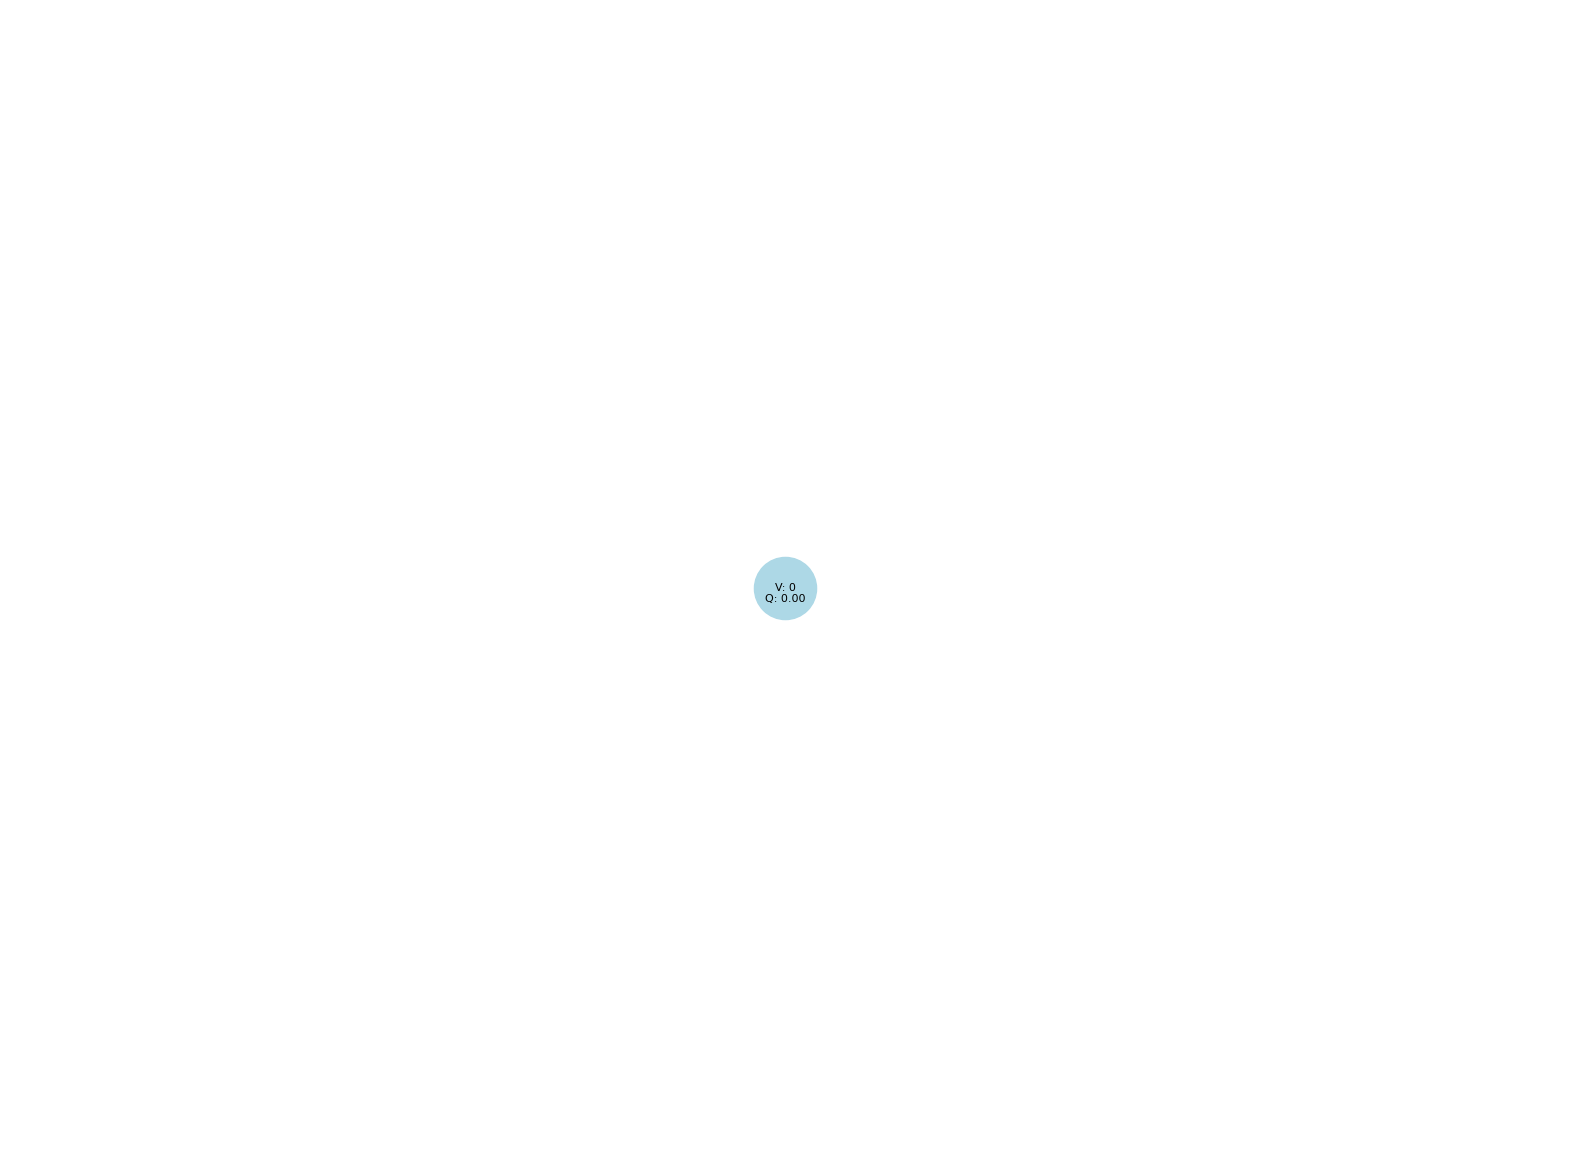

(<networkx.classes.digraph.DiGraph at 0x12463c1d0>, {4905429584: (0, 0)})

In [23]:
visualize_tree(root)

In [24]:
expand_node(root)

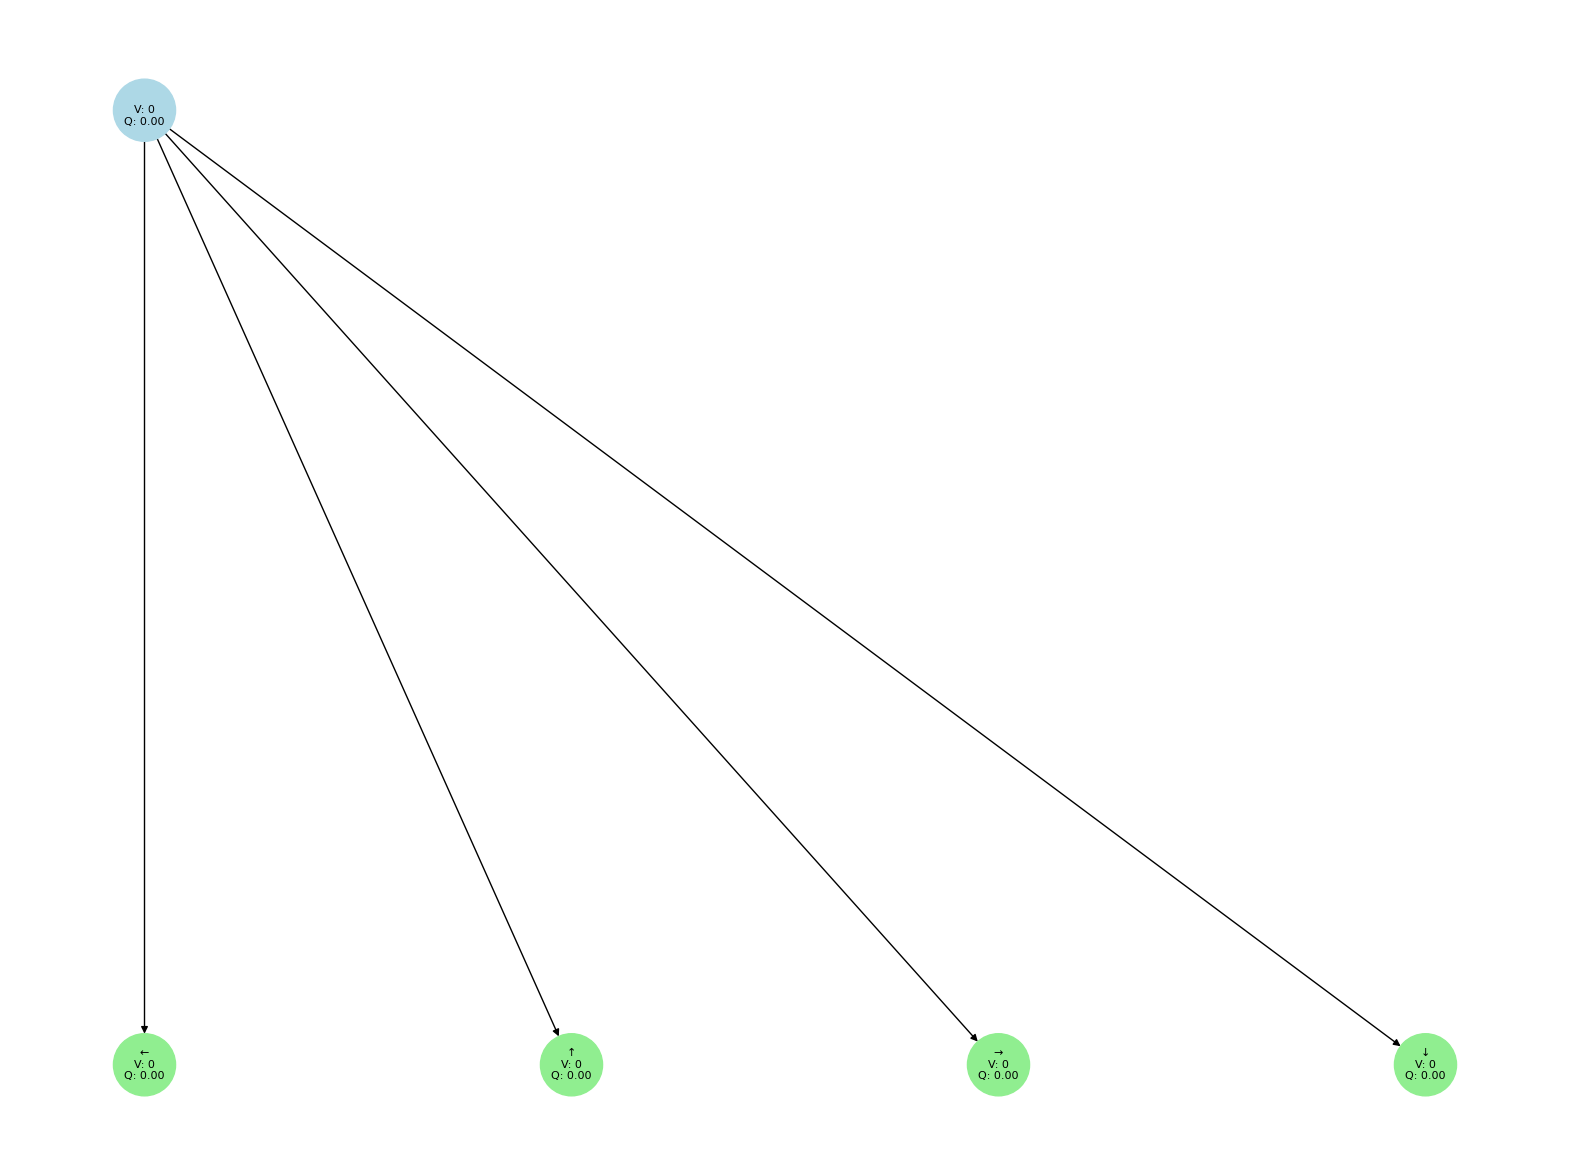

In [25]:
_, _ = visualize_tree(root)

In [26]:
monte_carlo_search(root, iterations=8)

Node(state=[[ 2  2  4  8]
 [ 2  2 64  8]
 [ 2  0  4 32]
 [ 0  2  0 16]], prior=0.0, is_chance=False, action=None, visits=0, value=0.0)
[0, 0, 0, 0]
---
Node(state=[[ 2  2  4  8]
 [ 2  2 64  8]
 [ 2  0  4 32]
 [ 0  2  0 16]], prior=0.0, is_chance=False, action=None, visits=1, value=52.0)
[1, 0, 0, 0]
---
Node(state=[[ 2  2  4  8]
 [ 2  2 64  8]
 [ 2  0  4 32]
 [ 0  2  0 16]], prior=0.0, is_chance=False, action=None, visits=2, value=764.0)
[1, 1, 0, 0]
---
Node(state=[[ 2  2  4  8]
 [ 2  2 64  8]
 [ 2  0  4 32]
 [ 0  2  0 16]], prior=0.0, is_chance=False, action=None, visits=3, value=892.0)
[1, 1, 1, 0]
---
Node(state=[[ 2  2  4  8]
 [ 2  2 64  8]
 [ 2  0  4 32]
 [ 0  2  0 16]], prior=0.0, is_chance=False, action=None, visits=4, value=1272.0)
[1, 1, 1, 1]
---
Node(state=[[ 4  4  4 16]
 [ 2  2 64 32]
 [ 0  0  4 16]
 [ 2  0  0  0]], prior=0.15, is_chance=False, action=None, visits=0, value=0.0)
[0, 0, 0, 0]
---
Node(state=[[ 2  2  4  8]
 [ 2  2 64  8]
 [ 2  0  4 32]
 [ 0  2  0 16]], prior=

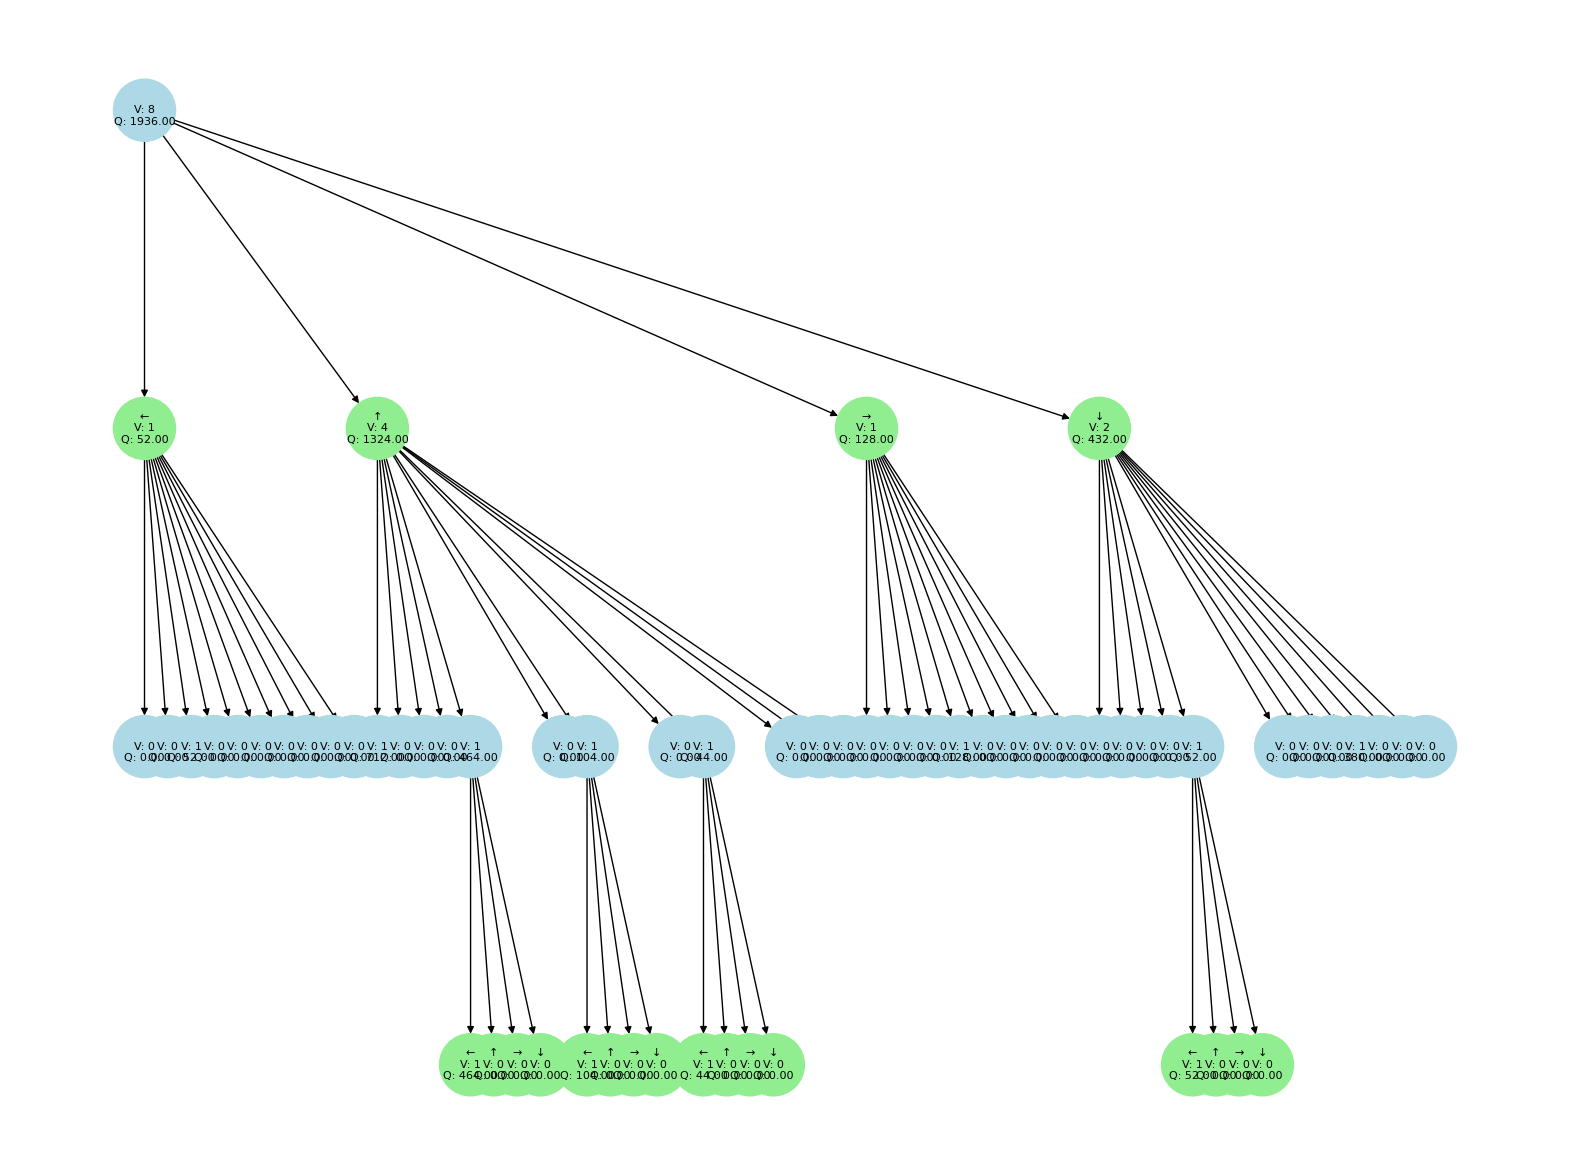

In [27]:
_, _ = visualize_tree(root)